In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import f1_score
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('C:\\Users\\ayyy\\ipython\\otto.csv',sep=',',header=0)
data = data.drop('id',axis=1)

In [4]:
#2.1.1
print(f"Instances: {len(data)}\nClasses: {len(data.columns)}")

Instances: 61878
Classes: 94


In [5]:
#2.1.2
#set every cell to itself as an int (except target)
data.iloc[:,1:-1] = data.iloc[:,:-1].astype(int)
#create a new column. if this column = 0, remove the row.
data['zcheck'] = data.iloc[:, 1:-1].sum(numeric_only = True, axis = 1)
data = data[data.zcheck != 0]
#remove 0check column after removing all the 0 rows
data = data.drop('zcheck', axis=1)

In [6]:
#2.1.3
label = preprocessing.LabelEncoder()
data['target'] = label.fit_transform(data['target'])
Y = data.target
X = data.drop('target', axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8,random_state=0)

In [18]:
#2.2
knn = KNeighborsClassifier(n_neighbors=10,algorithm='ball_tree')
knn.fit(X_train, Y_train)
rforest = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
rforest.fit(X_train, Y_train)
nb = ComplementNB()
nb.fit(X_train, Y_train)

ComplementNB()

In [19]:
#2.3
knnpred = knn.predict(X_test)
rforestpred = rforest.predict(X_test)
nbpred = nb.predict(X_test)

<AxesSubplot:>

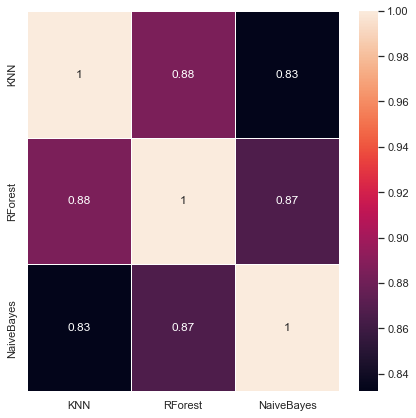

In [21]:
sns.set()
a = {"KNN":knnpred, "RForest":rforestpred,"NaiveBayes":nbpred}
corrdata = pd.DataFrame(data=a)
corr = corrdata.corr(method='pearson')
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)